### Error-reduction function of the Mariner code

In [30]:
from PyM import *

#### Just return the formula

$\sum_{j=8}^{32}\left(\left[\binom{32}{j}(1-p)^{32-j} p^{j-1} \text{ for } j \text{ in range}(8,32+1)\right]\right)
$

In [31]:
def mariner(p,rnd=10):
    return round(sum([binom(32,j)*(1-p)**(32-j)*p**(j-1) for j in range(8,32+1)]),rnd)

[mariner(0.03),mariner(0.02),mariner(0.01),mariner(0)]

[0.0001205685, 8.7638e-06, 8.49e-08, 0]

#### Optimized version

In [32]:
def erf_mariner(p,rnd=10):
    if p < 0.00001: return 0
    C = binom(32,8)
    P = (1-p)**24
    f = C*P
    q = p/(1-p)
    for j in range(9,32+1):
        C = C * (32-j+1)/(j)
        P = P*q
        f += C*P
    f = f * p**7
    return round(f,rnd)
    
[erf_mariner(0.03),erf_mariner(0.02),erf_mariner(0.01),erf_mariner(0.0)]



[0.0001205685, 8.7638e-06, 8.49e-08, 0]

In [46]:
erf_mariner(0.001,16)

1.03e-14

#### Graph of the **erf** of the Mariner code

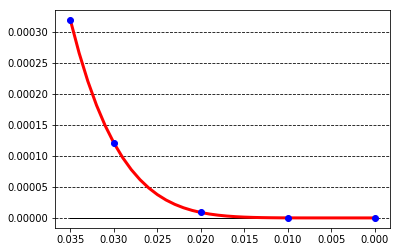

In [47]:
import matplotlib.pyplot as plt

X = [0.001*p for p in range(36)]
Y = [erf_mariner(x) for x in X]


fig,ax1 = plt.subplots()
ax1.plot([0.035,0],[0,0],'k-',linewidth=1)
ax1.plot(X,Y,'r-',linewidth=3)

ax1.grid(color='black', which='major', axis='y', linestyle='dashed')
ax1.invert_xaxis()



for p in range(0,4):
    plt.plot([0.01*p],[erf_mariner(0.01*p)],'bo')

plt.plot([0.035],[erf_mariner(0.035)],'bo')

plt.show()